<a href="https://colab.research.google.com/github/parul2903/emotions_classifier_bert/blob/main/bert_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

BASE_DIR = "/content/drive/MyDrive/DL_Ineuron/NLP"
os.chdir(BASE_DIR)

In [2]:
os.getcwd()

'/content/drive/MyDrive/DL_Ineuron/NLP'

### **Hugging Face is a community and data science platform that provides: Tools that enable users to build, train and deploy ML models based on open source (OS) code and technologies.**

### ***Hugging Face offers models based on Transformers for PyTorch and TensorFlow 2.0. There are thousands of pre-trained models to perform tasks such as text classification, extraction, question answering, and more. With its low compute costs, it is considered a low barrier entry for educators and practitioners.***

In [3]:
# bertviz : BertViz is an interactive tool for visualizing attention in Transformer language models such as BERT, GPT2, or T5.
# datasets : for downloading any kind of dataset
# huggingface_hub : to push the model to huggingface

!pip install transformers==4.15.0
!pip install bertviz
!pip install datasets
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 8.5 MB/s 
     |████████████████████████████████| 880 kB 67.0 MB/s 
     |████████████████████████████████| 163 kB 68.1 MB/s 
     |████████████████████████████████| 3.3 MB 54.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=08c9c87c4f81481523e7ba31c02f20e9b776abcb16f9164a5fd2d5694b64f4db
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 7.4 MB/s 
     |████████████████████████████████| 132 kB 52.3 MB/s 
     |████████████████████████████████| 1.3 MB 12.0 MB/s 
     |████████████████████████████████| 9.2 MB 48.5 MB/s 
     |████████████████████████████████| 79 

**DIFFERENCE BETWEEN BERT-BASE-UNCASED AND BERT BASE CASED**

***In BERT uncased, the text has been lowercased before WordPiece tokenization step while in BERT cased, the text is same as the input text (no changes). For example, if the input is "OpenGenus", then it is converted to "opengenus" for BERT uncased while BERT cased takes in "OpenGenus".***

In [4]:
# AutoTokenizer : generic tokenizer class
# BertConfig : Model configuration class with all the parameters of the model.
# "bert-base-uncased : "Pretrained model on English language using a masked language modeling (MLM) objective.
# from_pretrained allows you to load a pretrained model, which has already been trained on a specific dataset for a given number of epochs

from bertviz import head_view # The head view visualizes attention for one or more attention heads in the same layer.
from transformers import BertModel, AutoTokenizer, BertConfig 

# output_hidden_states and output_attentions are True so that we can visualize the embeddings
config = BertConfig.from_pretrained("bert-base-uncased", output_hidden_states = True, output_attentions = True)
bertmodel = BertModel.from_pretrained("bert-base-uncased", config = config)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [5]:
text1 = "Time flies like arrow"
text2 = "Jet fly like bullet in air"

# A PyTorch Tensor is basically the same as a numpy array
input = tokenizer(text1, text2, return_tensors = "pt") # PyTorch tensor # "tf" : tensorflow
attention_out = bertmodel(**input) # ** : dictionary of keyword arguements
attention_out = attention_out[-1]
tokens = tokenizer.convert_ids_to_tokens(input.input_ids[0])
print(tokens)
head_view(attention_out, tokens, heads = [10])

['[CLS]', 'time', 'flies', 'like', 'arrow', '[SEP]', 'jet', 'fly', 'like', 'bullet', 'in', 'air', '[SEP]']


<IPython.core.display.Javascript object>

### **TEXT CLASSIFIER**

#### ***EMOTIONS DATASET***

***Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.***

***There are six classes in this dataset.***

**PADDING AND TRUNCATION**

**When developing the author classification model, the number of integers for each training and test text data need to be of equal length. We can achieve this by padding and truncating the sequence of integers.**

**Eg. Suppose we are specifying the maximum length of all the sequences, that is, maxlen, to be 300. This will truncate any sequences that are longer than 300 integers in an article and add zeroes(padding to sequences that are shorter than 300 integers in an article.**

**map() function**

**The primary purpose of map() is to speed up processing functions. It allows you to apply a processing function to each example in a dataset, independently or in batches. This function can even create new rows and columns.**

**The map() function supports working with batches of examples. Operate on batches by setting batched=True. The default batch size is 1000, but you can adjust it with the batch_size parameter.**

In [6]:
from datasets import load_dataset
from transformers import AutoTokenizer

raw_dataset = load_dataset("emotion")
checkpoint = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
  return tokenizer(example["text"], padding = True, truncation = True)

tokenized_dataset = raw_dataset.map(tokenize_function, batched = True)

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

## **AUTO MODEL**

####**AutoModel is a generic model class that will be instantiated as one of the base model classes of the library.**

**We can get the model directly from the checkpoint by using different class types of AutoModel:**

***1) AutoModelForSequenceClassification – This class is used to get a text classification model from the checkpoint.***

***2) AutoModelForCasualLM*** – This class is used to get a language model from the given checkpoint.

***3) AutoModelForQuestionAnswering*** – This class is used to get a model to perform context-based question answering etc…**

In [7]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 6) # because there are 6 different classes of emotions

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [8]:
# login into the huggingface account

! huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [9]:
! git config --global credential.helper store

In [10]:
# SETTING THE TRAINING ARGUEMENTS

from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer",
                                  evaluation_strategy = "steps",
                                  num_train_epochs = 4,
                                  push_to_hub = True,
                                  push_to_hub_model_id = "bert_emotions_classifier")

/usr/local/lib/python3.7/dist-packages/transformers/training_args.py:926: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case ps2903/bert_emotions_classifier).
  FutureWarning,


In [11]:
# TRAINING THE MODEL

from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_dataset['train'],
    eval_dataset = tokenized_dataset['validation'],
    tokenizer = tokenizer
)

/content/drive/MyDrive/DL_Ineuron/NLP/test-trainer is already a clone of https://huggingface.co/ps2903/bert_emotions_classifier. Make sure you pull the latest changes with `repo.git_pull()`.


In [12]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 16000
  Num Epochs = 4
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 8000


Step,Training Loss,Validation Loss
500,0.699700,0.414791
1000,0.339600,0.361036
1500,0.277000,0.326159
2000,0.249200,0.206013
2500,0.148400,0.246097
3000,0.171400,0.191937
3500,0.146600,0.234194
4000,0.200700,0.238318
4500,0.123000,0.259742
5000,0.142600,0.233596


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
tokenizer config file saved in test-trainer/tokenizer_config.json
Special tokens file saved in test-trainer/special_tokens_map.json
Several commits (3) will be pushed upstream.
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to t

TrainOutput(global_step=8000, training_loss=0.19113318681716918, metrics={'train_runtime': 1615.5188, 'train_samples_per_second': 39.616, 'train_steps_per_second': 4.952, 'total_flos': 2630633583473568.0, 'train_loss': 0.19113318681716918, 'epoch': 4.0})

**training set : 16000**

**validation set : 2000**

**test set : 2000**

***label_ids are the actual labels and preds are the predicted labels***

***As you can see, predictions is a two-dimensional array with shape 2000 x 6 (2000 being the number of elements in the dataset we used). Those are the logits for each element of the dataset we passed to predict() (all Transformer models return logits). To transform them into predictions that we can compare to our labels, we need to take the index with the maximum value on the second axis.***

In [13]:
# MAKING PREDICTIONS

import numpy as np

predictions = trainer.predict(tokenized_dataset["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

preds = np.argmax(predictions.predictions, axis = -1)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 8


(2000, 6) (2000,)


In [14]:
# EVALUATION

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cf_matrix = confusion_matrix(predictions.label_ids, preds)
print("Accuracy Score: ", accuracy_score(predictions.label_ids, preds))
print("Precision Score: ", precision_score(predictions.label_ids, preds, average = "weighted"))
print("Recall Score: ", recall_score(predictions.label_ids, preds, average = "weighted"))
print("F1 Score: ", f1_score(predictions.label_ids, preds, average = "weighted"))

Accuracy Score:  0.9325
Precision Score:  0.9328593156094047
Recall Score:  0.9325
F1 Score:  0.932555197012679


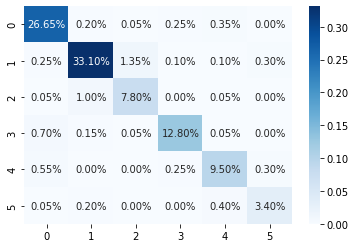

In [15]:
# PLOTTING
# annot – an array of the same shape as data which is used to annotate the heatmap
# fmt – string formatting code to use when adding annotations

import numpy as np
import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

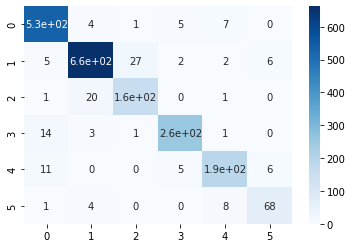

In [16]:
# PLOTTING CONFUSION MATRIX

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

In [ ]:
# PUSHING THE MODEL TO HUB

trainer.push_to_hub()

In [18]:
# MASKED MULTI HEADED ATTENTION EXAMPLE THROUGH PYTORCH

import torch

a = torch.randn(5, 5)
print(torch.tril(a)) # triangular matrix

tensor([[ 1.3123,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.6581,  0.0780,  0.0000,  0.0000,  0.0000],
        [-1.0546,  1.2780,  0.1453,  0.0000,  0.0000],
        [-0.1423,  0.1971, -0.6417, -2.2064,  0.0000],
        [ 2.8140,  0.3598, -0.0898,  0.4584, -0.5644]])
